In [84]:
import pandas as pd
import matplotlib.pyplot as plt
Datascience=pd.read_csv('Datascience1.csv')
Datascience.head(5)

,Country,Experience_Years,Salary,Number_of_Projects,Performance_Score,Education_Level,Certification_Status
0,Australia,4,79023.02,25,90.60,PhD,Certified
1,Germany,20,82018.29,41,91.26,Diploma,Certified
2,Brazil,4,85697.62,31,89.75,PhD,Certified
3,India,18,132660.65,21,66.19,PhD,Certified
4,Australia,4,59538.49,20,88.26,Bachelor's,Certified


In [4]:
Datascience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               15000 non-null  object 
 1   Experience_Years      15000 non-null  int64  
 2   Salary                14970 non-null  float64
 3   Number_of_Projects    15000 non-null  int64  
 4   Performance_Score     14970 non-null  float64
 5   Education_Level       14710 non-null  object 
 6   Certification_Status  15000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 820.4+ KB


In [5]:
Datascience.dtypes

Country                  object
Experience_Years          int64
Salary                  float64
Number_of_Projects        int64
Performance_Score       float64
Education_Level          object
Certification_Status     object
dtype: object

In [110]:
#Tuning the salary to numeric
Datascience['Salary']=pd.to_numeric(Datascience['Salary'])
Datascience

,Country,Experience_Years,Salary,Number_of_Projects,Performance_Score,Education_Level,Certification_Status
0,0,4,79023.020000,25,90.600000,3,Certified
1,5,20,82018.290000,41,91.260000,1,Certified
2,1,4,85697.620000,31,89.750000,3,Certified
3,6,18,132660.650000,21,66.190000,3,Certified
4,0,4,59538.490000,20,88.260000,0,Certified
...,...,...,...,...,...,...,...
14995,2,19,135394.447044,41,58.600701,3,Not Certified
14996,4,15,117171.204402,33,91.356918,2,Not Certified
14997,4,8,101004.219209,35,73.344739,3,Not Certified
14998,9,6,102262.257378,15,91.059326,3,Not Certified


In [109]:
Datascience.describe()

,Country,Experience_Years,Salary,Number_of_Projects,Performance_Score,Education_Level
count,14968.000000,14968.000000,14968.000000,14968.000000,14968.000000,14968.000000
mean,4.603821,10.486304,83929.298274,25.422435,74.573877,1.525254
std,2.924482,5.856216,25114.129620,14.242077,14.758743,1.096971
min,0.000000,0.000000,30000.000000,1.000000,50.000000,0.000000
25%,2.000000,6.000000,65626.839014,14.000000,61.834059,1.000000
50%,5.000000,10.000000,81449.160284,25.000000,74.521453,2.000000
75%,7.000000,15.000000,101492.214625,38.000000,87.474619,2.000000
max,9.000000,22.000000,157806.163962,52.000000,100.000000,3.000000


In [7]:
#Checking for missing values.
Datascience.isnull().sum()

Country                   0
Experience_Years          0
Salary                   30
Number_of_Projects        0
Performance_Score        30
Education_Level         290
Certification_Status      0
dtype: int64

In [85]:
#Replacing the missing values with their corresponding mean and modes
Datascience['Salary']=Datascience['Salary'].fillna(Datascience['Salary'].mean())
Datascience['Performance_Score']=Datascience['Performance_Score'].fillna(Datascience['Performance_Score'].mean())
Datascience['Education_Level']=Datascience['Education_Level'].fillna(Datascience['Education_Level'].mode()[0])

In [86]:
Datascience.isnull().sum()

Country                 0
Experience_Years        0
Salary                  0
Number_of_Projects      0
Performance_Score       0
Education_Level         0
Certification_Status    0
dtype: int64

In [87]:
#Dropping the duplicates.
Datascience=Datascience.drop_duplicates()

In [111]:
numeric_data=Datascience.select_dtypes(include='number')


In [112]:
correlation=numeric_data.corr()
correlation

,Country,Experience_Years,Salary,Number_of_Projects,Performance_Score,Education_Level
Country,1.000000,-0.022546,0.002068,-0.029155,0.015179,0.032610
Experience_Years,-0.022546,1.000000,0.587928,-0.037745,-0.008750,0.021328
Salary,0.002068,0.587928,1.000000,-0.029446,0.030792,0.549195
Number_of_Projects,-0.029155,-0.037745,-0.029446,1.000000,-0.018319,-0.001339
Performance_Score,0.015179,-0.008750,0.030792,-0.018319,1.000000,-0.037128
Education_Level,0.032610,0.021328,0.549195,-0.001339,-0.037128,1.000000


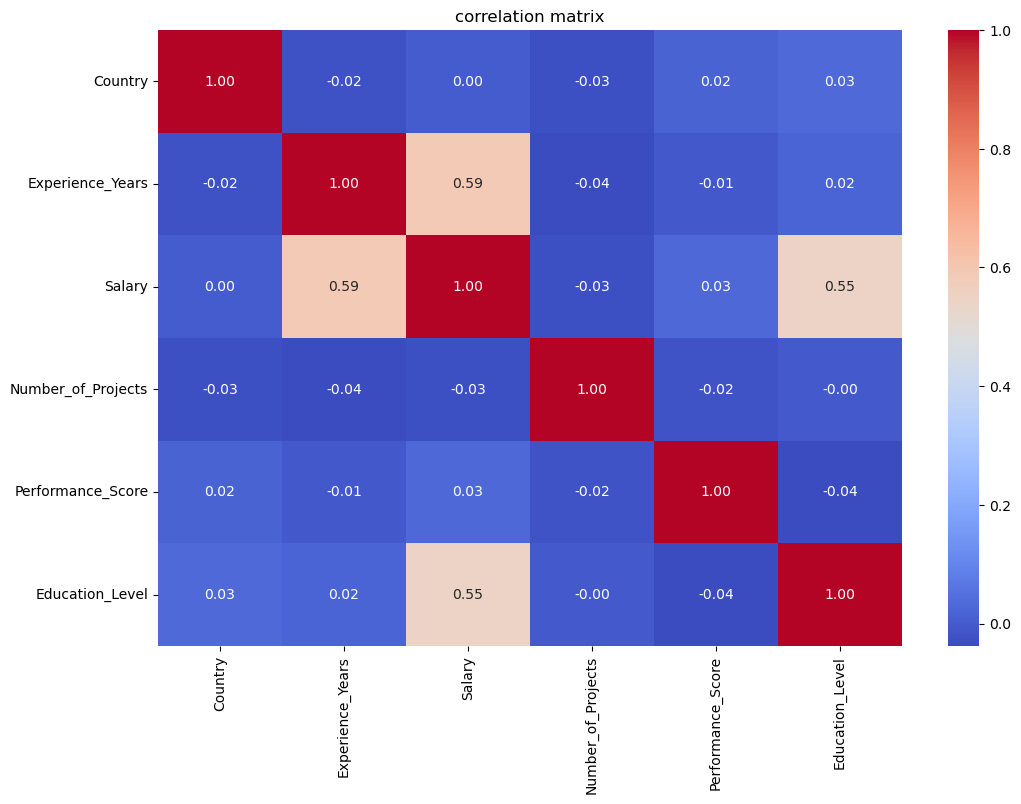

In [113]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix')
plt.show()

<Axes: xlabel='Experience_Years', ylabel='Salary'>

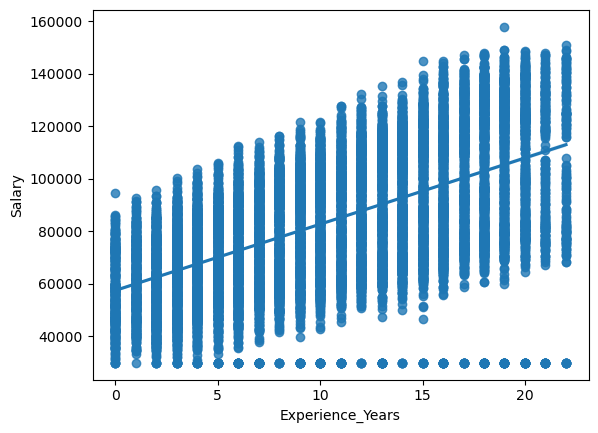

In [114]:
sns.regplot(data=Datascience,x='Experience_Years',y='Salary')

In [115]:
pivot=Datascience.pivot_table(
    index='Education_Level',
    values='Salary',
    columns='Country',
    aggfunc='sum',
)
pivot

Country,0,1,2,3,4,5,6,7,8,9
Education_Level,,,,,,,,,,
0,2.505309e+07,2.483095e+07,2.847866e+07,2.608391e+07,3.526964e+07,2.087859e+07,3.165976e+07,1.717770e+07,2.743928e+07,2.641879e+07
1,2.467252e+07,2.755676e+07,2.046937e+07,1.714683e+07,2.064565e+07,2.630104e+07,2.035788e+07,1.721848e+07,2.979357e+07,2.652127e+07
2,3.144760e+07,3.801267e+07,4.015247e+07,4.505579e+07,3.594601e+07,1.951416e+07,4.808226e+07,4.122078e+07,3.203177e+07,4.350264e+07
3,4.126922e+07,3.794787e+07,3.745784e+07,2.848107e+07,2.824830e+07,3.671786e+07,3.722097e+07,4.570446e+07,4.709628e+07,4.716995e+07


BOXPLOTTING THE SALARY WITH CERTIFICATE.

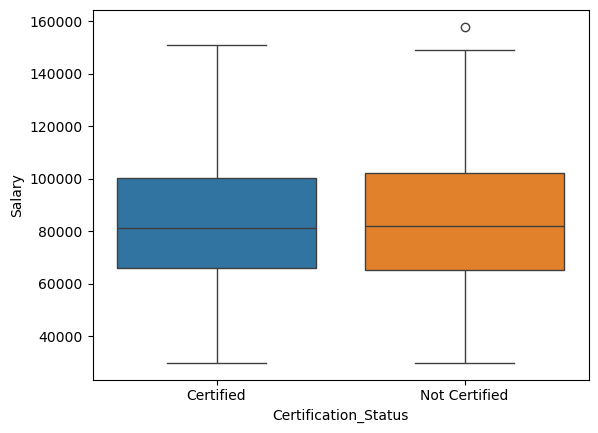

In [116]:

sns.boxplot(data=Datascience,x='Certification_Status',y='Salary',hue='Certification_Status')
plt.show()

<Axes: xlabel='Country', ylabel='Salary'>

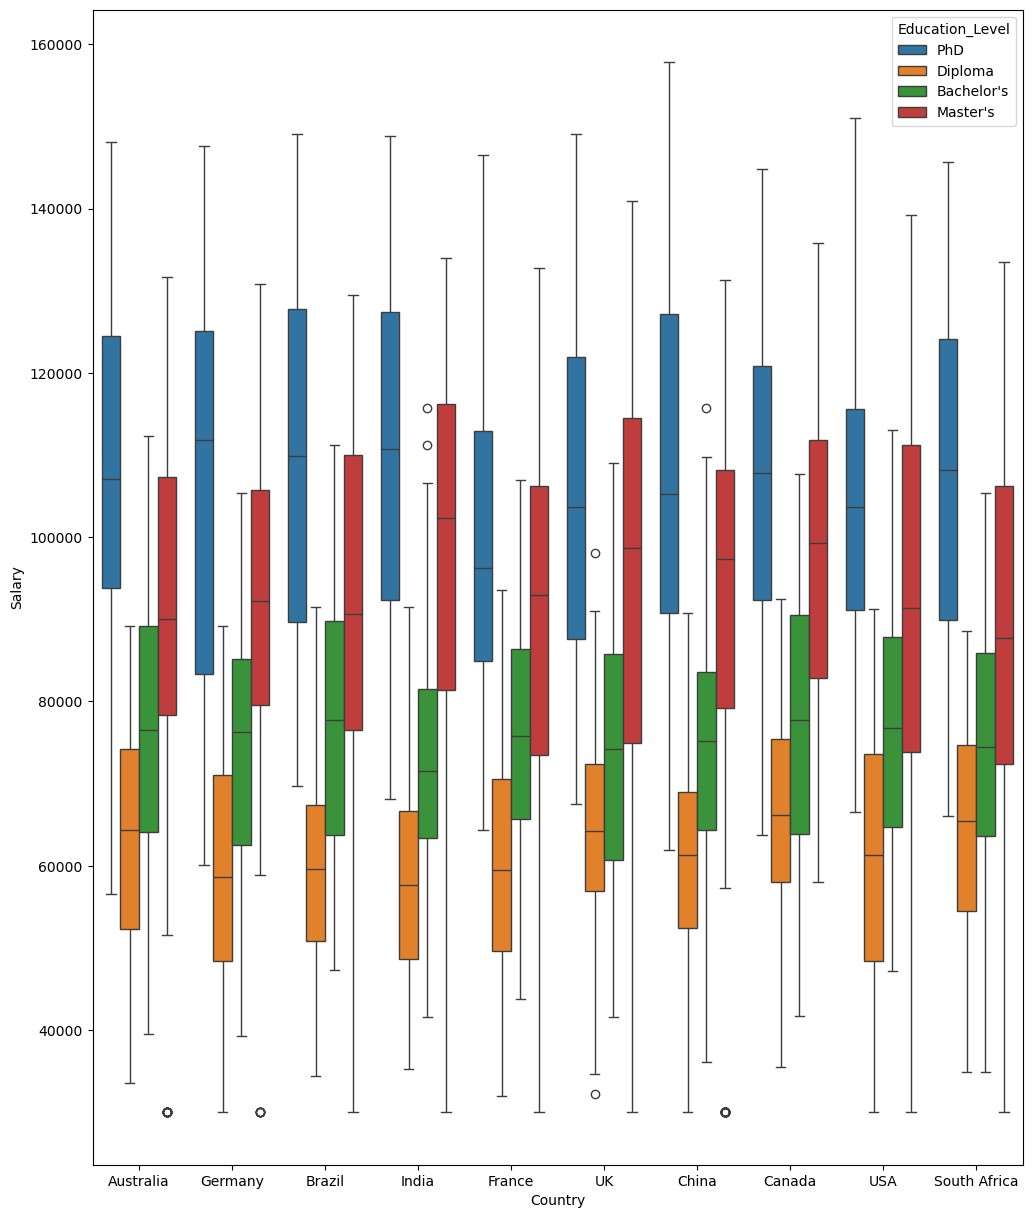

In [79]:
#Boxplotting salary with the number of experience years
plt.figure(figsize=(12,15))
sns.boxplot(data=Datascience,x='Country',y='Salary',hue='Education_Level')

In [103]:
#Building a randomforest model to predict the salary someone should be expecting based 
#on the country, the performance score , Experience years and level fo education.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [117]:
#Encoding the categorical features.
#Using one hot encoding for non-ordinal categorical features 
#And Label Encoder for ordinal categorical features.
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

Datascience['Education_Level']=label_encoder.fit_transform(Datascience['Education_Level'])
Datascience['Country']=label_encoder.fit_transform(Datascience['Country'])
Datascience


,Country,Experience_Years,Salary,Number_of_Projects,Performance_Score,Education_Level,Certification_Status
0,0,4,79023.020000,25,90.600000,3,Certified
1,5,20,82018.290000,41,91.260000,1,Certified
2,1,4,85697.620000,31,89.750000,3,Certified
3,6,18,132660.650000,21,66.190000,3,Certified
4,0,4,59538.490000,20,88.260000,0,Certified
...,...,...,...,...,...,...,...
14995,2,19,135394.447044,41,58.600701,3,Not Certified
14996,4,15,117171.204402,33,91.356918,2,Not Certified
14997,4,8,101004.219209,35,73.344739,3,Not Certified
14998,9,6,102262.257378,15,91.059326,3,Not Certified


In [118]:
#selecting the target and the independent variables.
X=Datascience[['Education_Level','Country','Performance_Score','Experience_Years']]
y=Datascience['Salary']

In [119]:
#Splitting the data into training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

11974
2994


In [120]:
#Handling missing vaues
X=X.dropna()
y=y.dropna()

In [121]:
#scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [122]:
#Building the model.
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [123]:
#predicting the salaries.
y_predict=model.predict(X_test_scaled)

In [ ]:
#Evaluating the model's accuracy.

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=mean_squared_error(y_test,y_predict,squared=False)
r2=r2_score(y_test,y_predict)

In [ ]:
print(f'Mean absolute Error:{mae}')
print(f'Mean squared Error:{mse}')
print(f'Root mean squared Error:{rmse}')
print(f'R-squared:{r2}')
pppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp

Mean absolute Error:11896.058349815125
Mean squared Error:230125371.34753907
Root mean squared Error:15169.883695913395
R-squared:0.6351882187762663
